In [23]:
from google.colab import files

uploaded = files.upload()

Saving Cardiotocographic.csv to Cardiotocographic (1).csv


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.	Data Cleaning and Preparation:

In [25]:
# Checking data size

df= pd.read_csv("Cardiotocographic.csv")
df.shape

(2126, 14)

In [26]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [27]:
# Checking for missing values

df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [28]:
# Checking data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [29]:
# Replacing missing values with median

df.fillna(df.median(), inplace=True)

In [30]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [31]:
# Checking for duplicates

df[df.duplicated()].shape

(2, 14)

In [32]:
df[df.duplicated()]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [33]:
# Dropping duplicates

df.drop_duplicates(inplace=True)

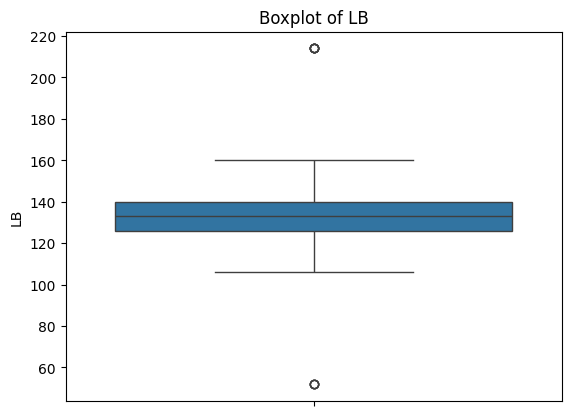

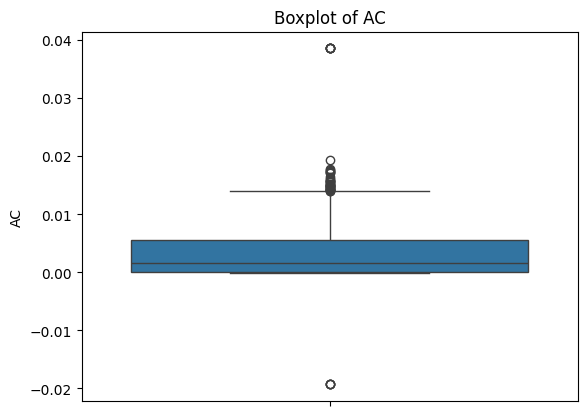

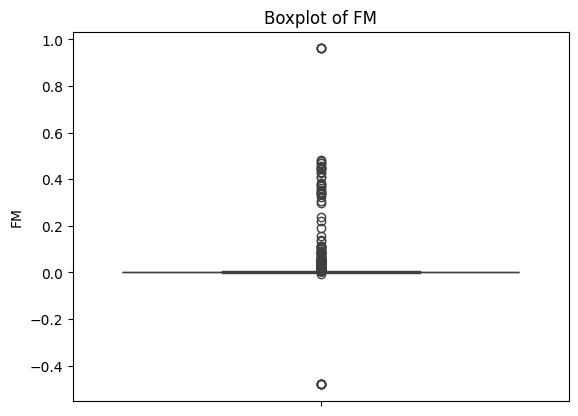

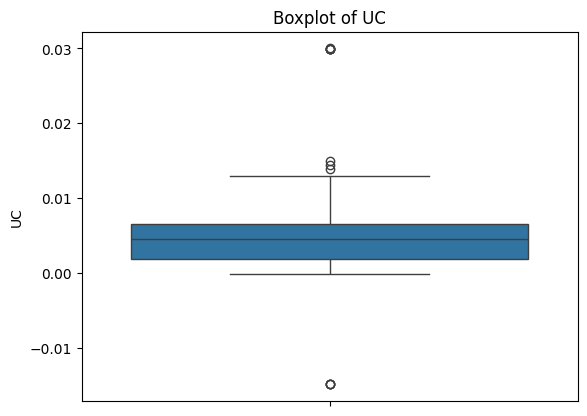

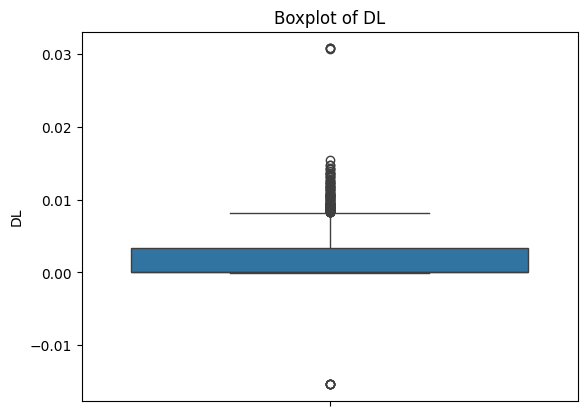

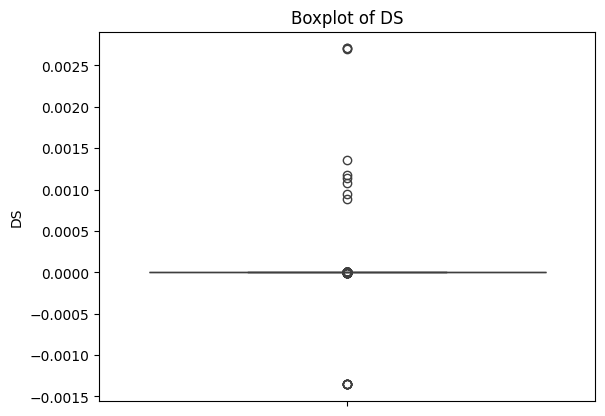

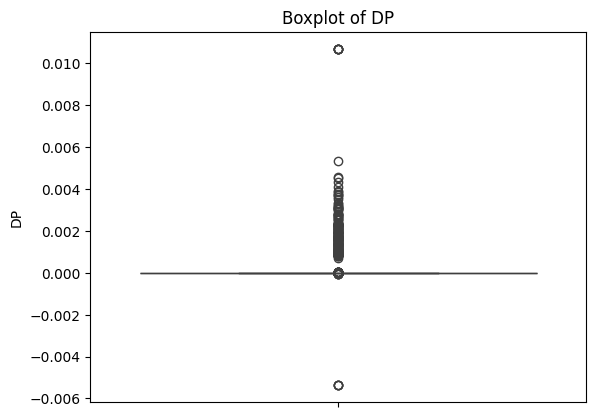

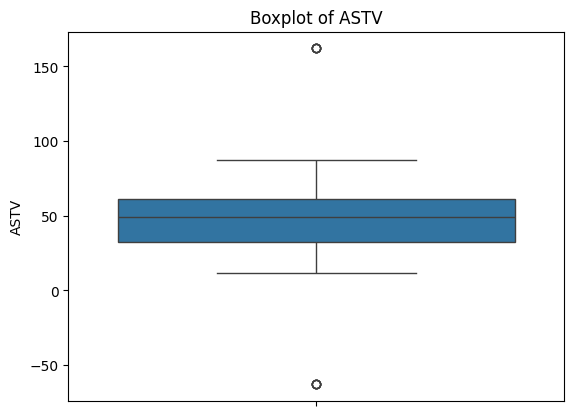

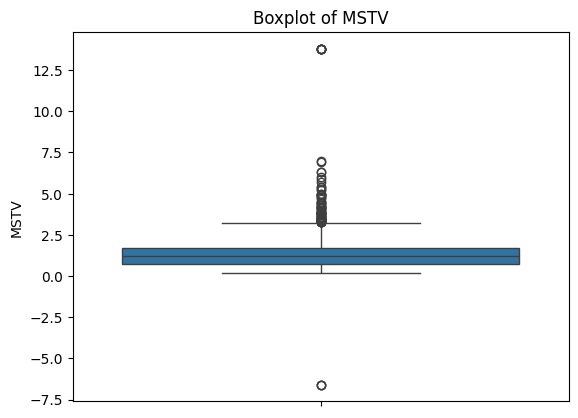

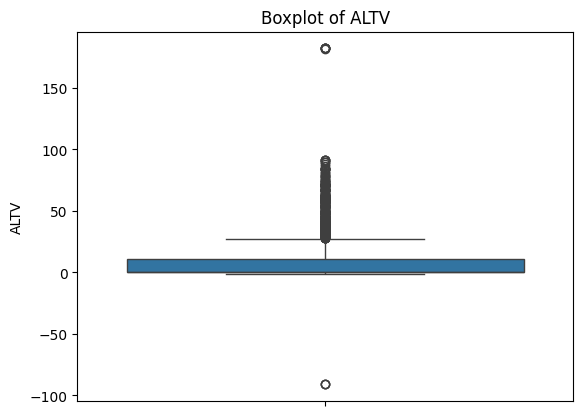

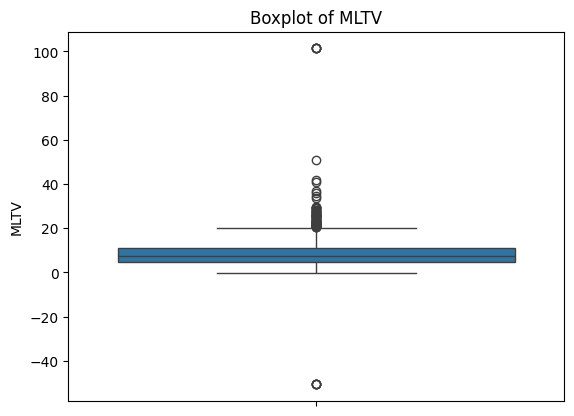

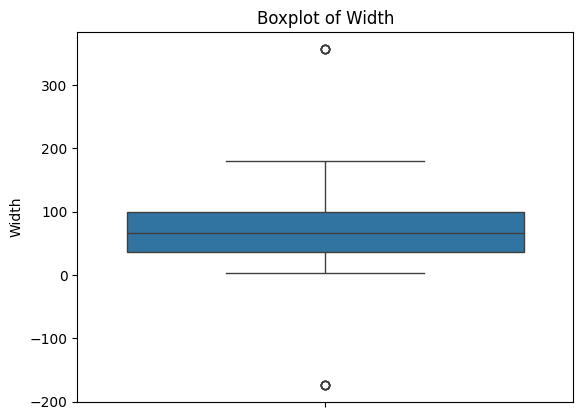

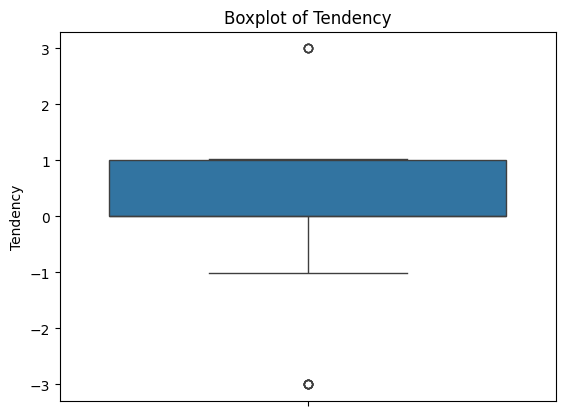

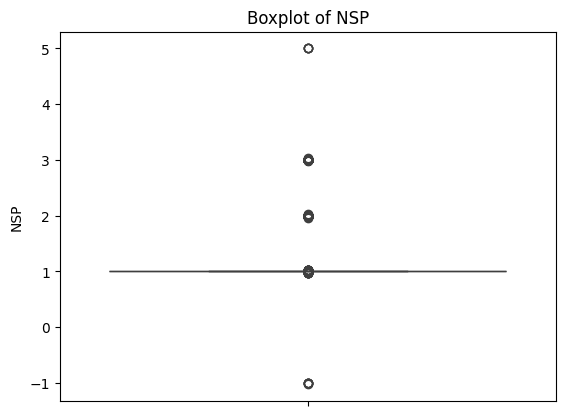

In [34]:
# Boxplot

for i in df.columns:
  sns.boxplot(df[i])
  plt.title(f"Boxplot of {i}")
  plt.show()

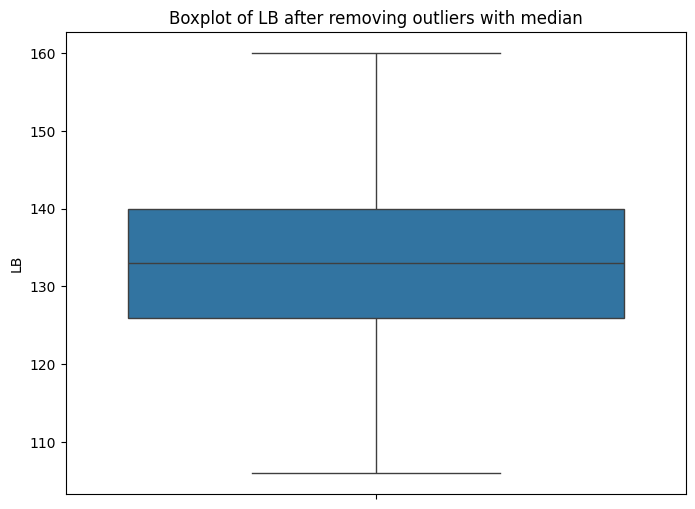

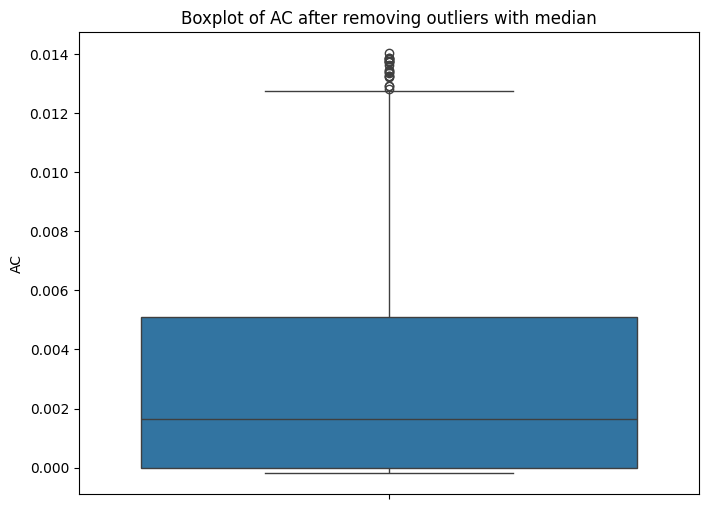

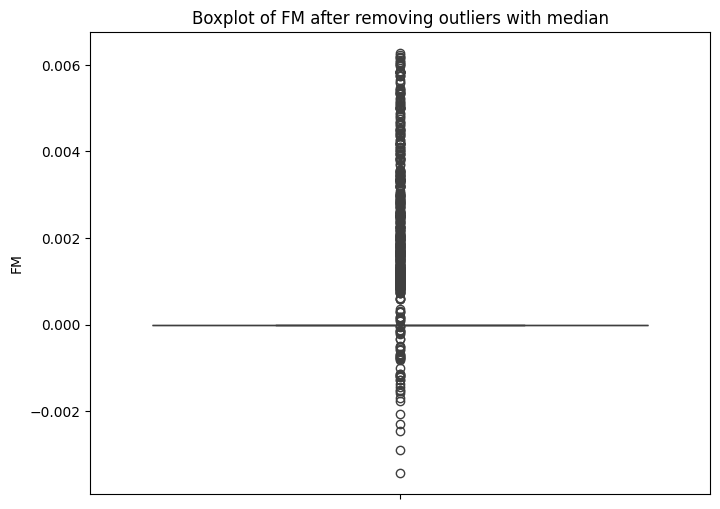

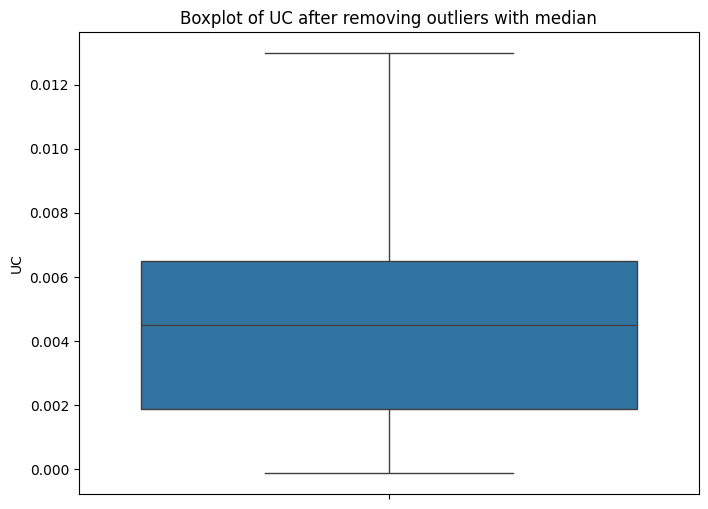

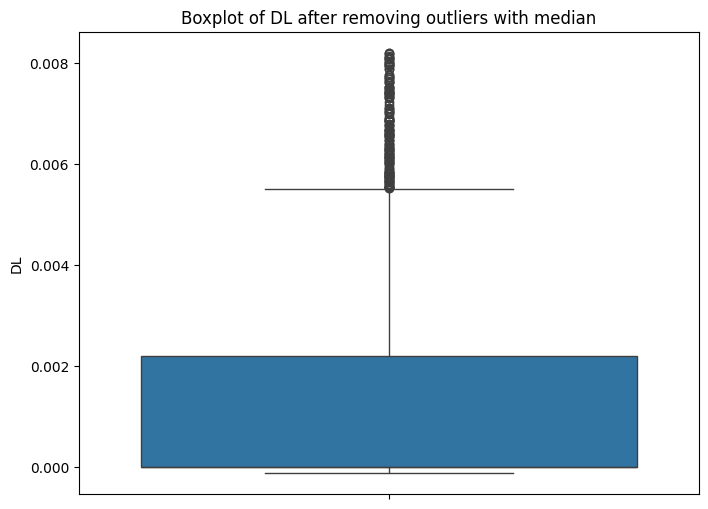

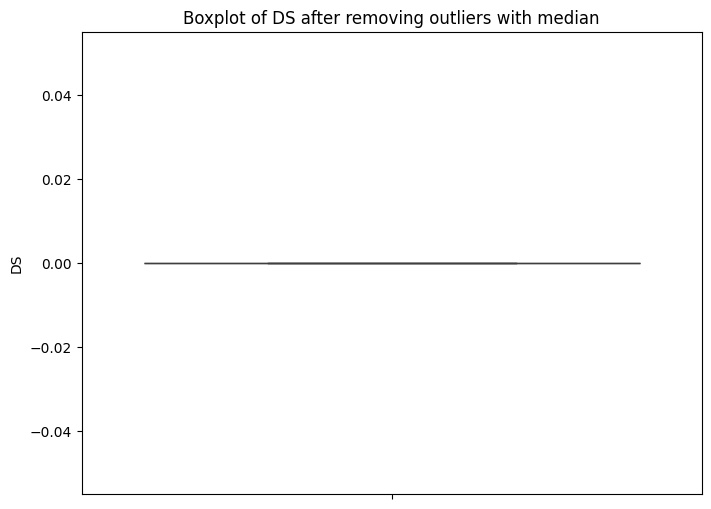

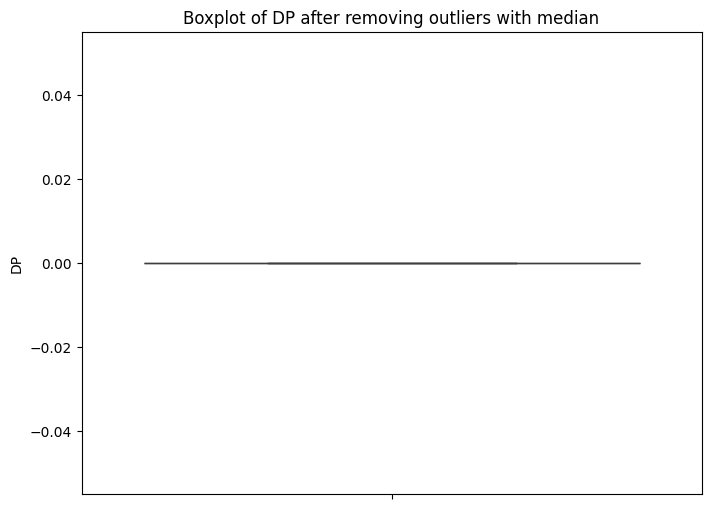

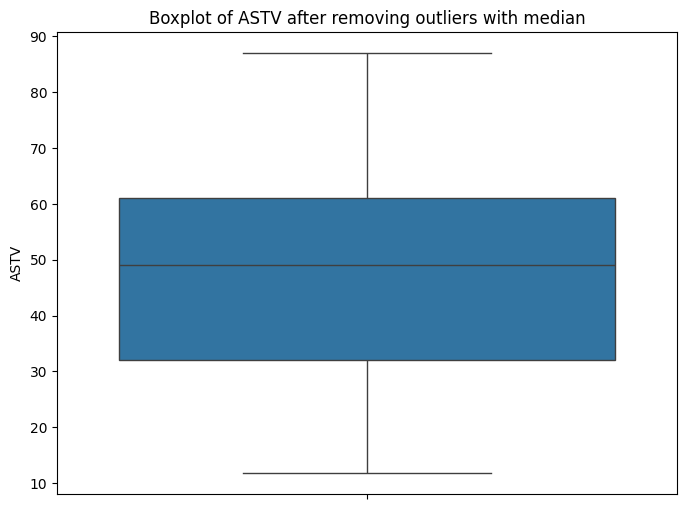

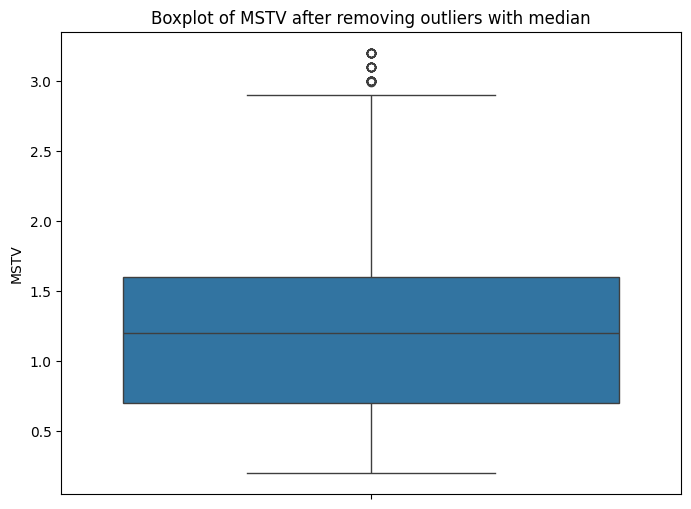

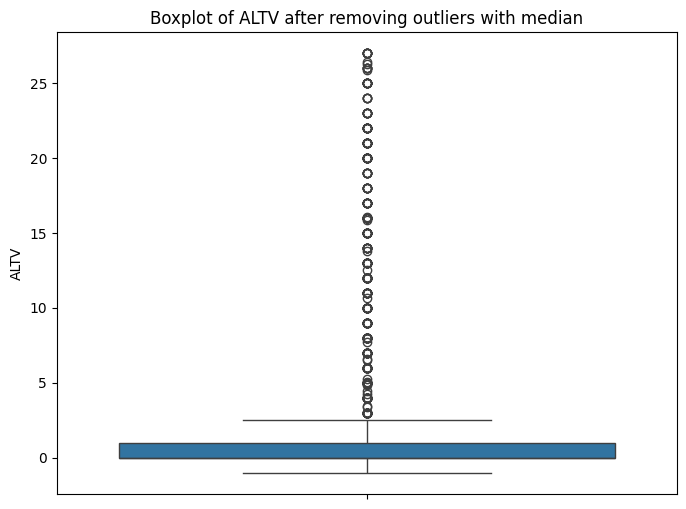

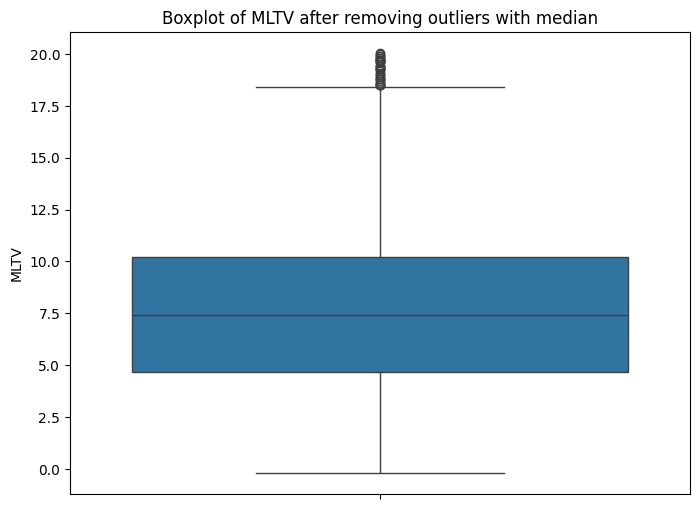

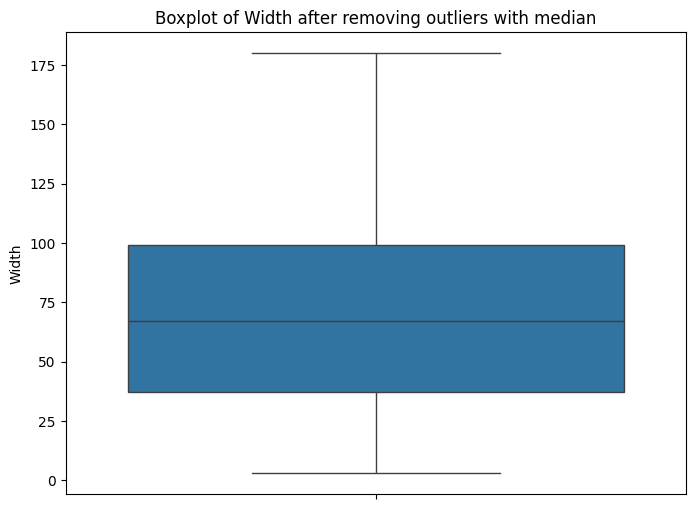

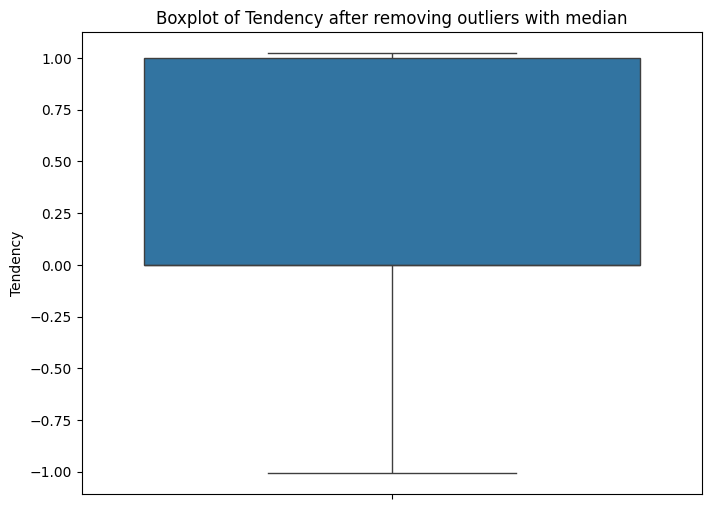

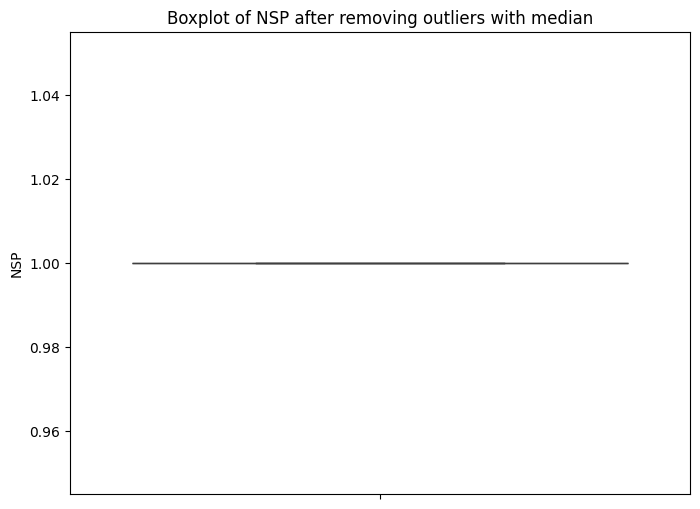

In [35]:
# Handling outliers with median imputation

df1= df.copy()

for i in df1.columns:
  q1= np.quantile(df1[i], 0.25)
  q3= np.quantile(df1[i], 0.75)
  med= np.median(df1[i])
  iqr= q3-q1
  upper_bound= q3+1.5*(iqr)
  lower_bound= q1-1.5*(iqr)
  df1[i]= np.where((df1[i]> upper_bound) | (df1[i]< lower_bound), med, df1[i])

for i in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(df1[i])
  plt.title(f"Boxplot of {i} after removing outliers with median")
  plt.show()

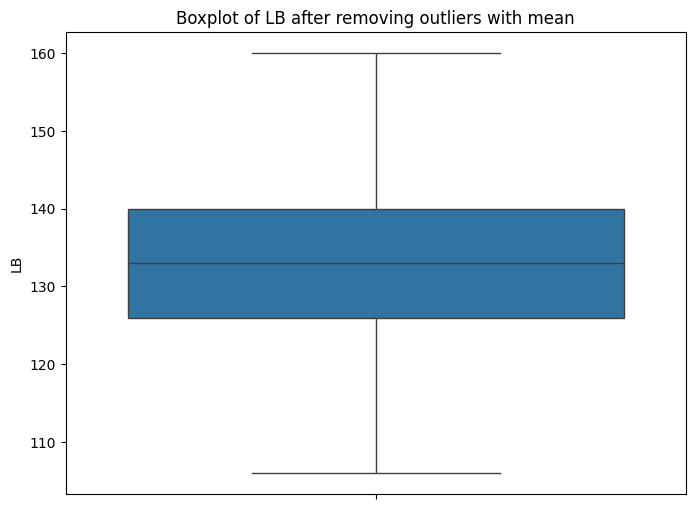

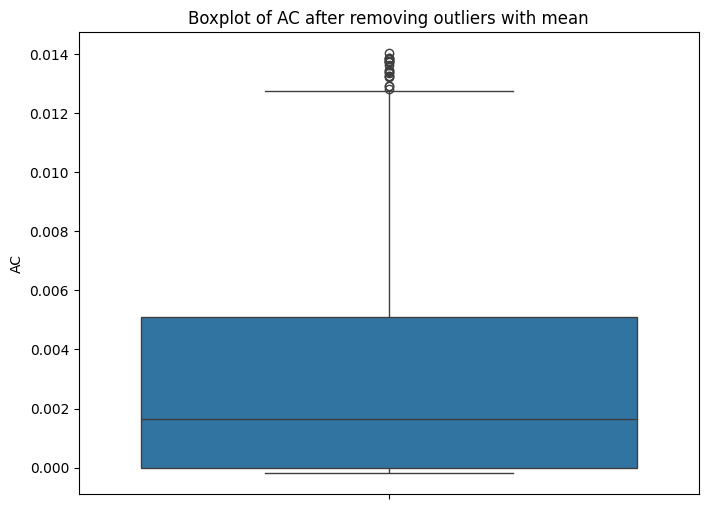

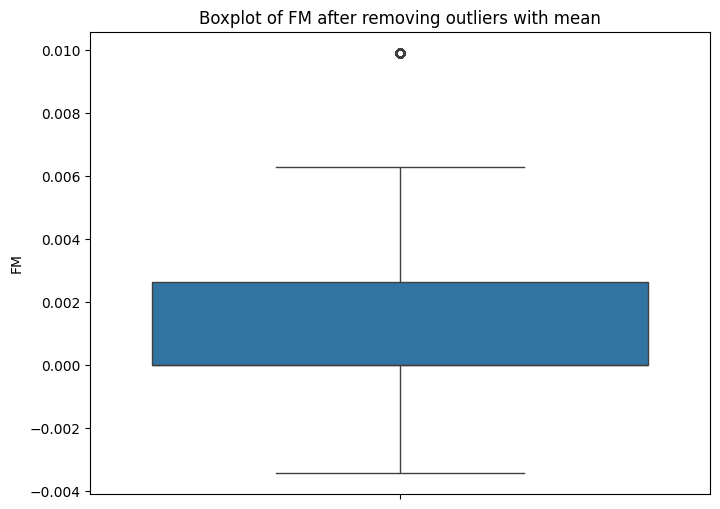

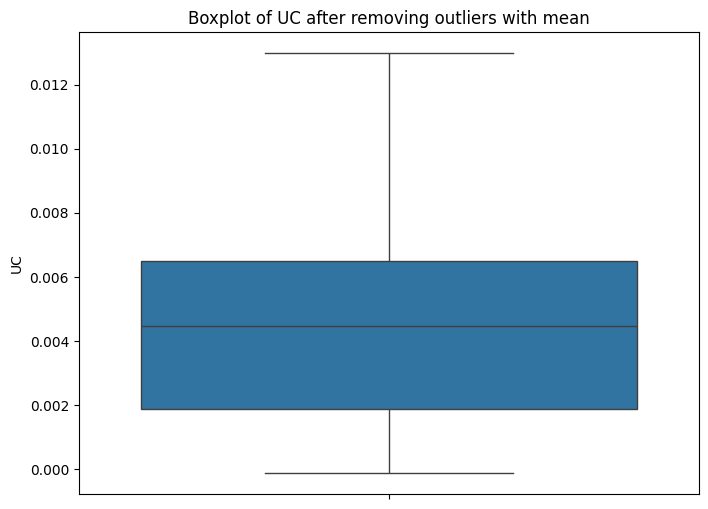

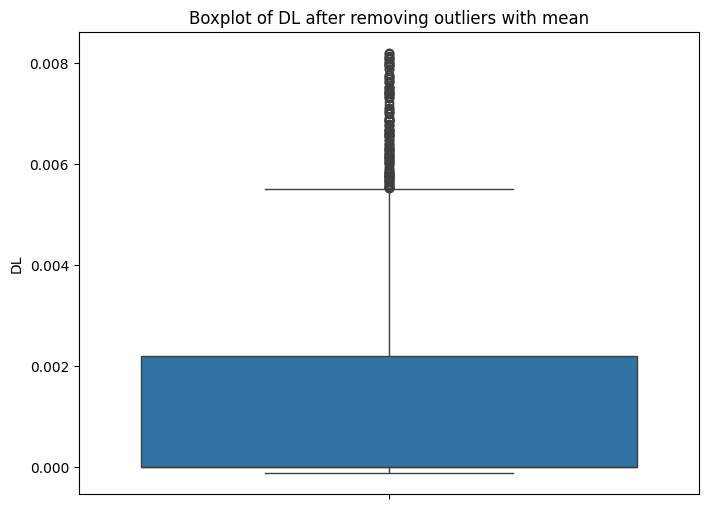

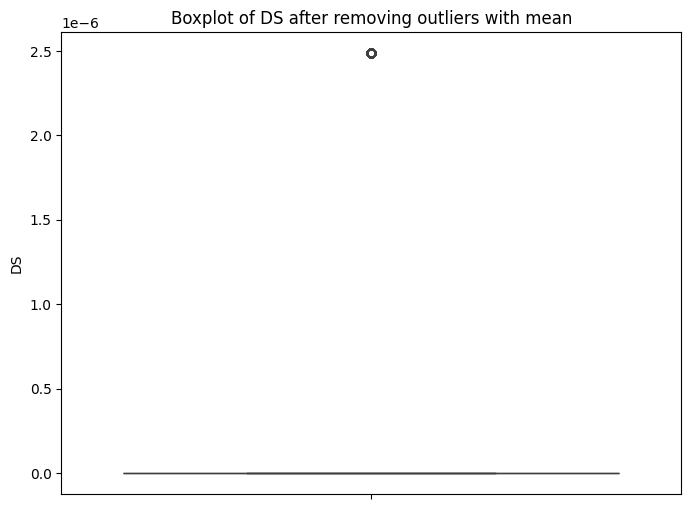

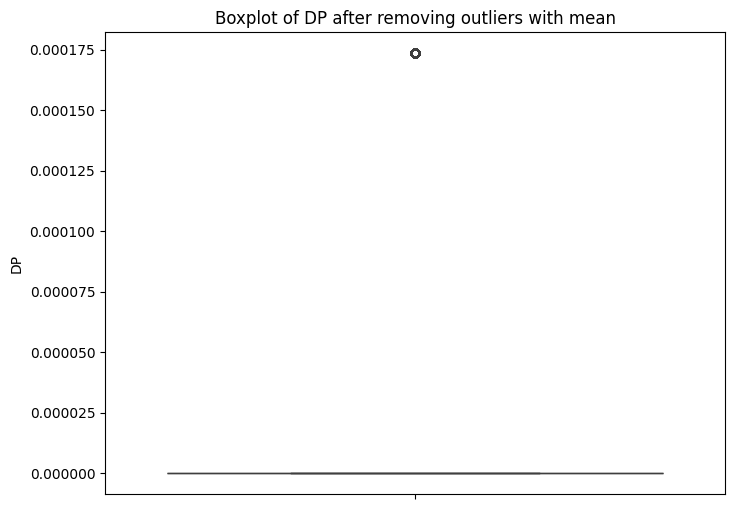

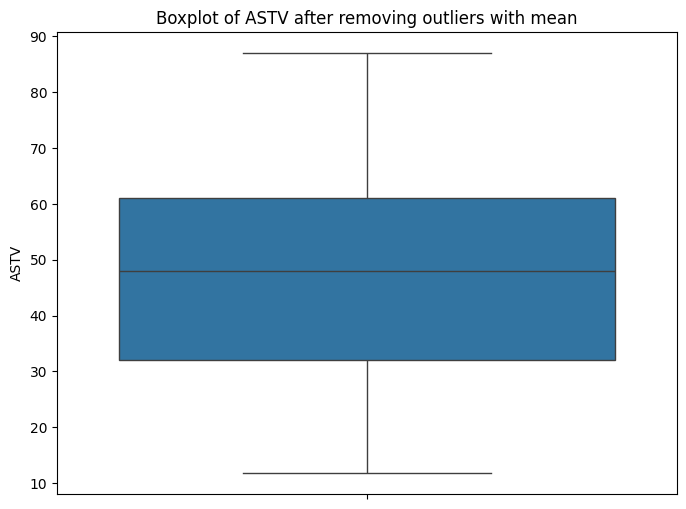

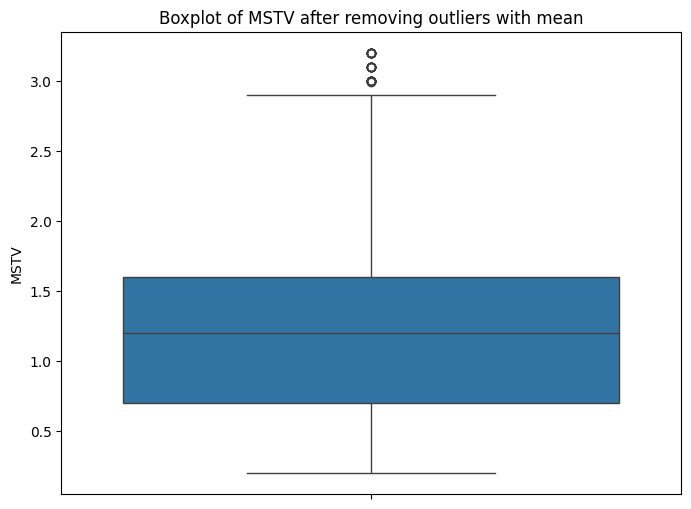

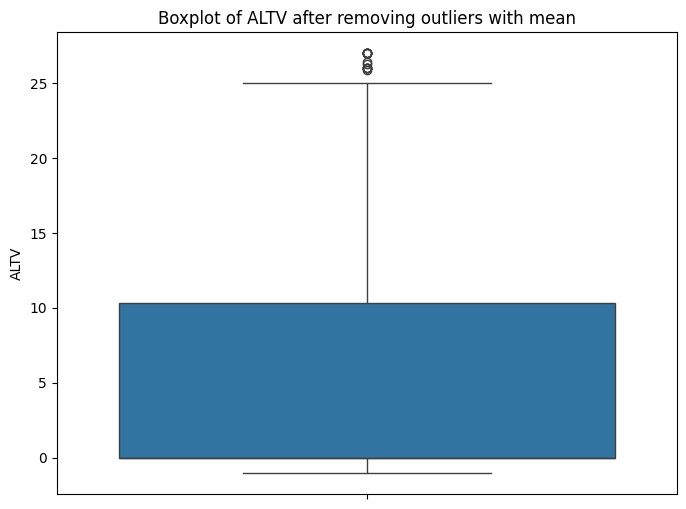

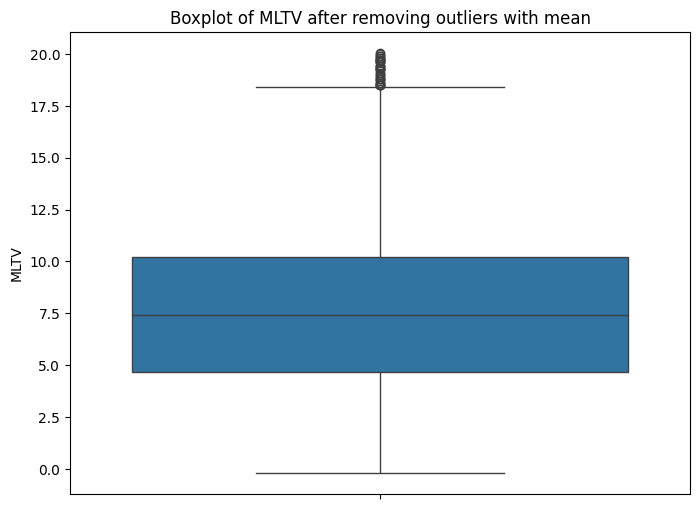

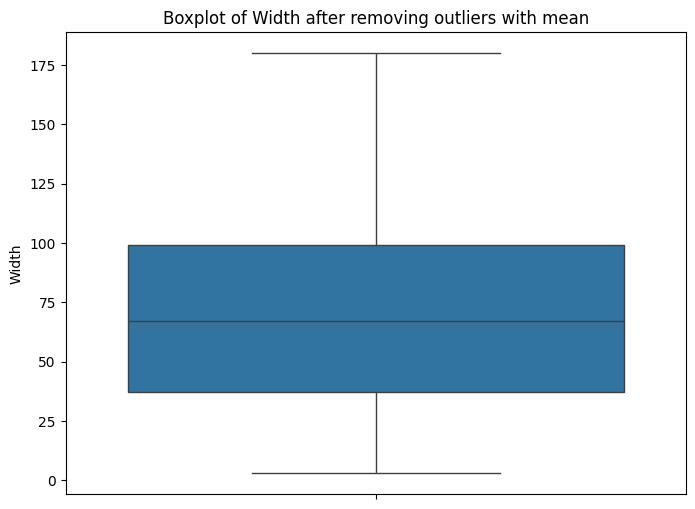

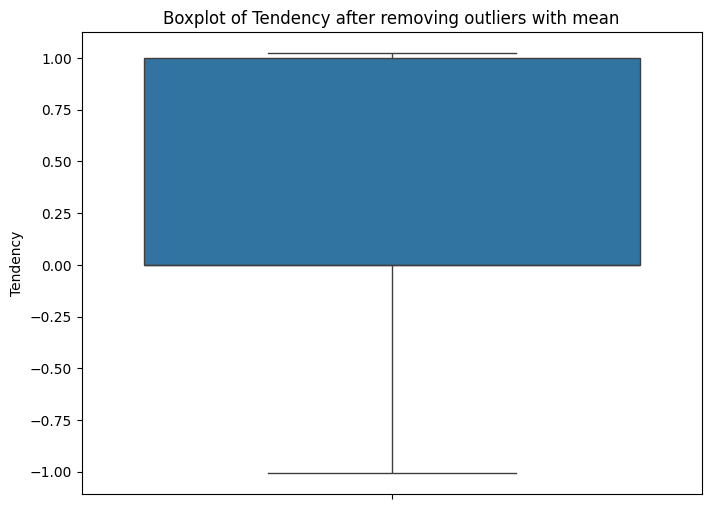

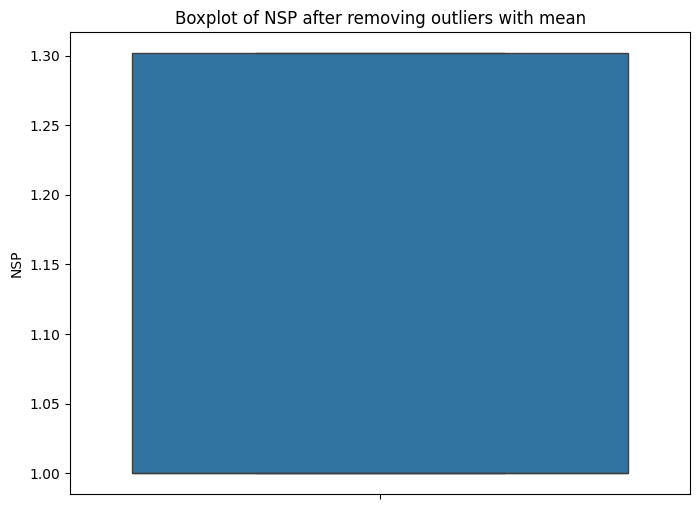

In [36]:
# Handling outliers with mean imputation

df2= df.copy()

for i in df2.columns:
  q1= np.quantile(df2[i], 0.25)
  q3= np.quantile(df2[i], 0.75)
  mean= np.mean(df2[i])
  iqr= q3-q1
  upper_bound= q3+1.5*(iqr)
  lower_bound= q1-1.5*(iqr)
  df2[i]= np.where((df2[i]> upper_bound) | (df2[i]< lower_bound), mean, df2[i])

for i in df.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(df2[i])
  plt.title(f"Boxplot of {i} after removing outliers with mean")
  plt.show()

# Therefore, mean imputation worked better with outliers.

# 2.	Statistical Summary:

In [38]:
# Basics statitics

df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.000000,2124.00000,2124.000000,2124.000000,2124.000000
mean,133.338641,0.003205,0.009904,0.004394,0.001897,0.000002,0.000174,47.012459,1.364345,10.295650,8.27184,70.426833,0.313541,1.301783
std,11.212447,0.004374,0.067571,0.003340,0.003344,0.000141,0.000836,18.812403,1.174084,21.212676,7.73691,42.728278,0.643417,0.642369
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.70000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.60000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.40000,67.000000,0.000000,1.000000
75%,140.000000,0.005612,0.002568,0.006536,0.003292,0.000000,0.000000,61.000000,1.700000,11.000000,10.80000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.40000,357.000000,3.000000,5.000000


In [39]:
# Interquartile range

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

iqr = pd.DataFrame({'Q1': q1, 'Q3': q3, 'IQR': iqr})
iqr

,Q1,Q3,IQR
LB,126.000000,140.000000,14.000000
AC,0.000000,0.005612,0.005612
FM,0.000000,0.002568,0.002568
UC,0.001858,0.006536,0.004678
DL,0.000000,0.003292,0.003292
DS,0.000000,0.000000,0.000000
DP,0.000000,0.000000,0.000000
ASTV,32.000000,61.000000,29.000000
MSTV,0.700000,1.700000,1.000000
ALTV,0.000000,11.000000,11.000000


The features have varying ranges, with "LB" (Baseline Fetal Heart Rate) ranging from 51.84 to 214, indicating a wide spectrum of fetal heart rates observed in the dataset.

# 3.	Data Visualization:

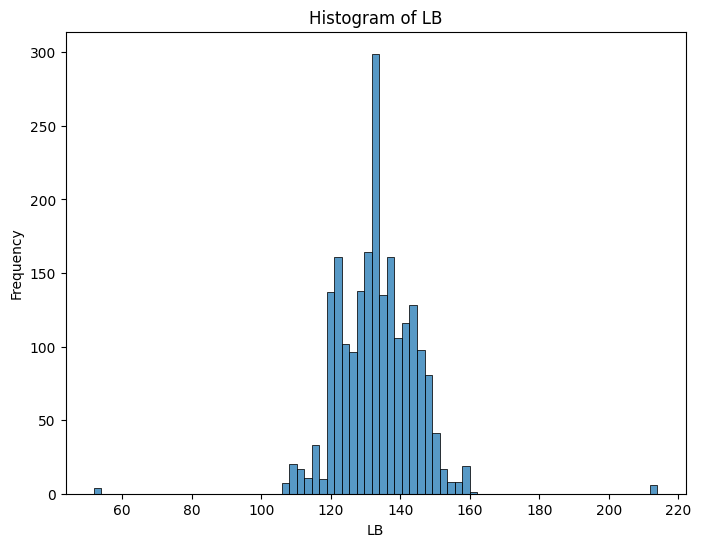

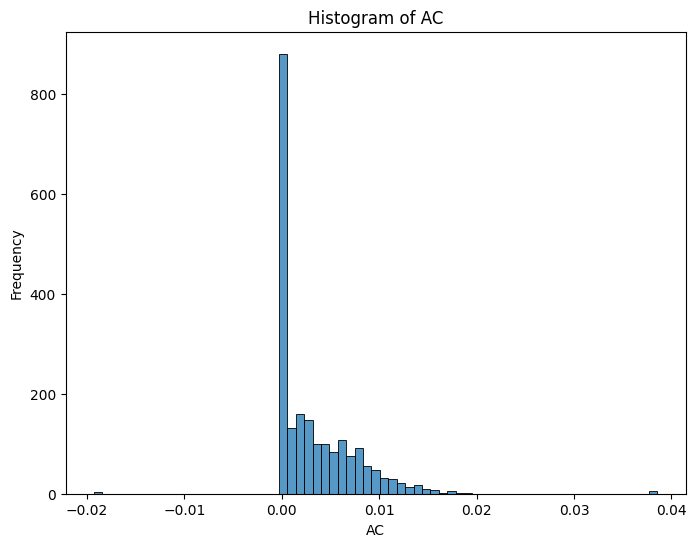

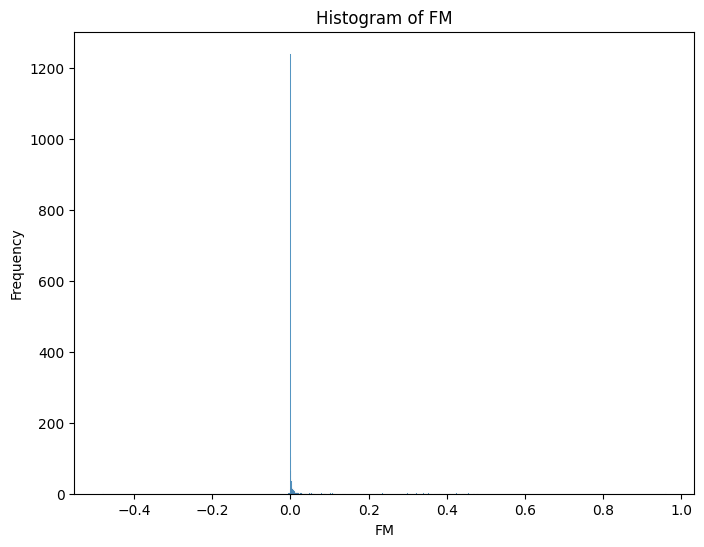

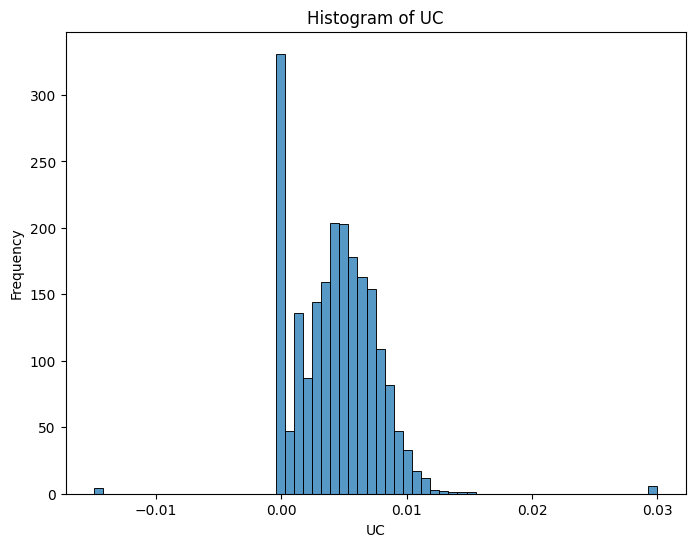

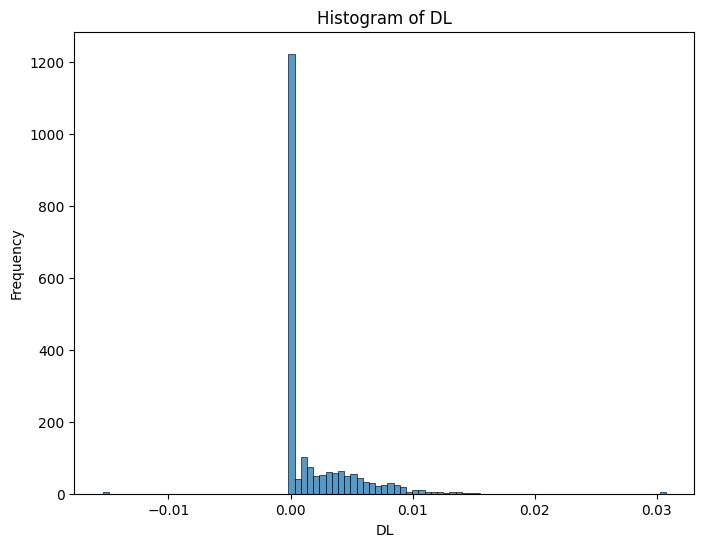

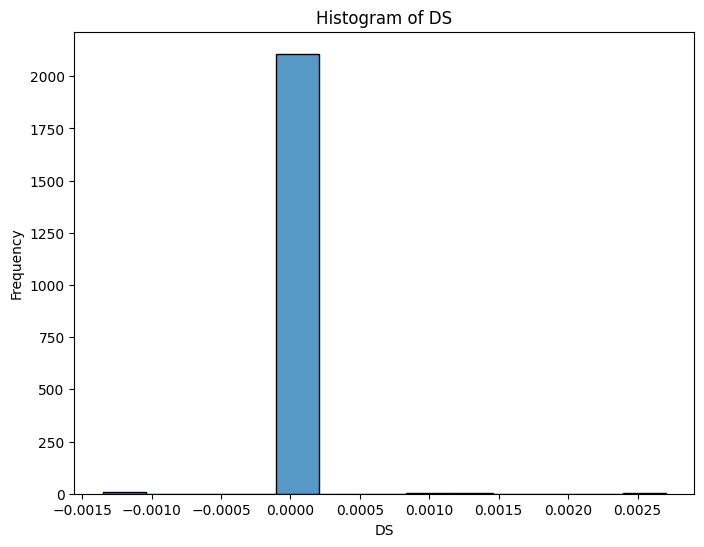

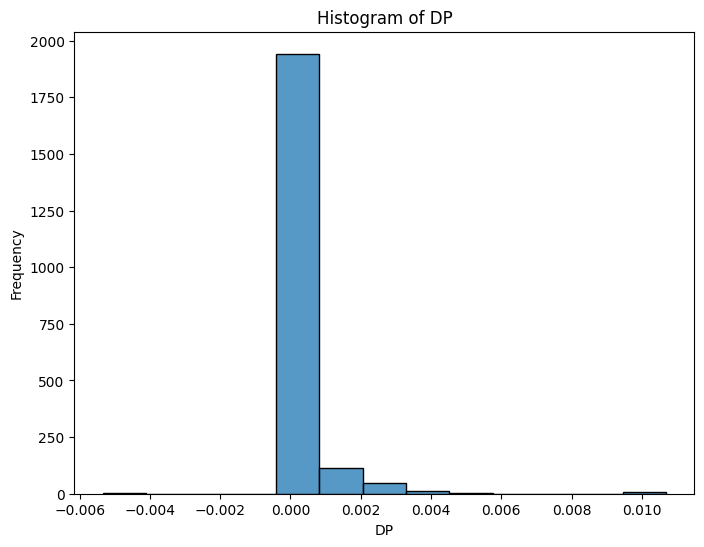

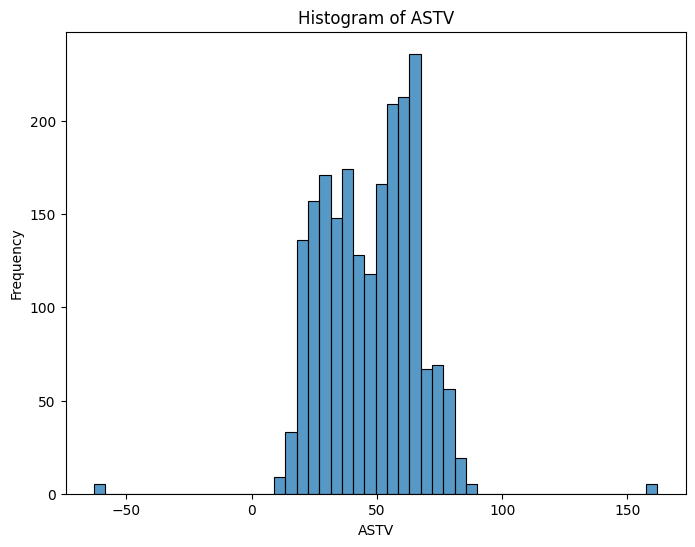

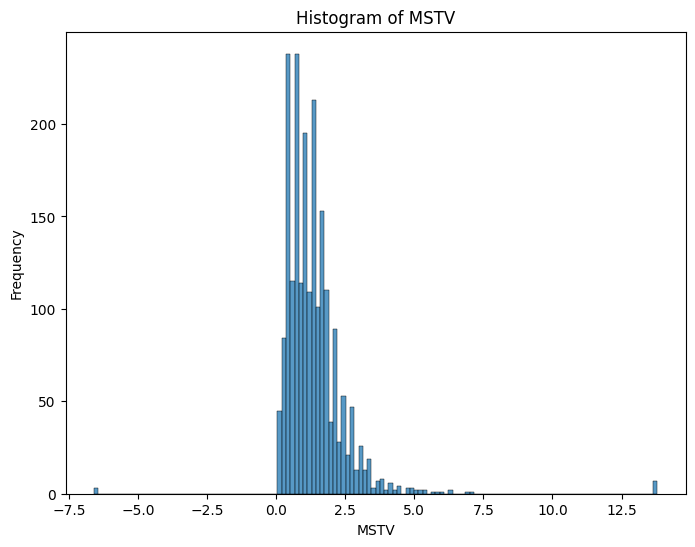

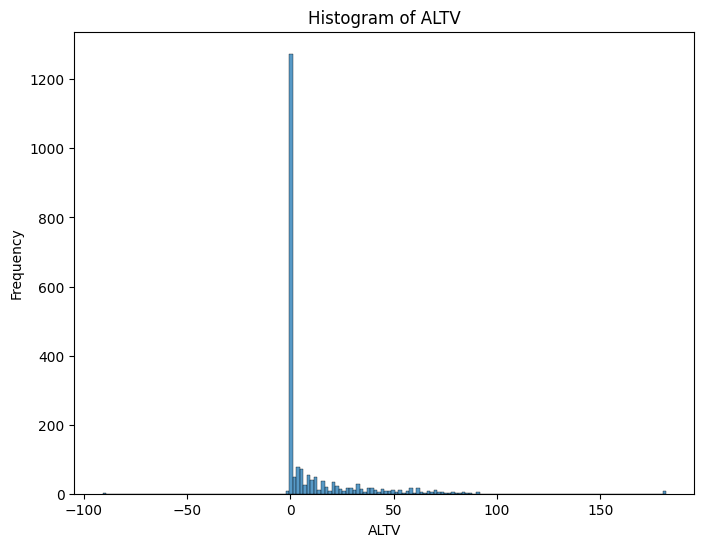

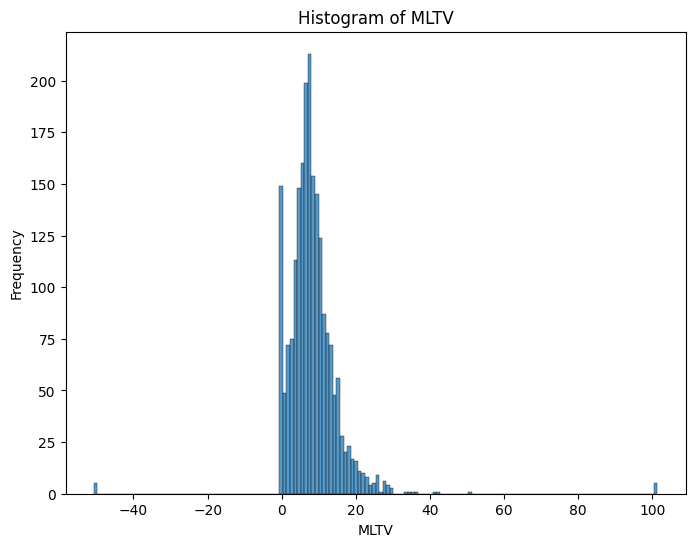

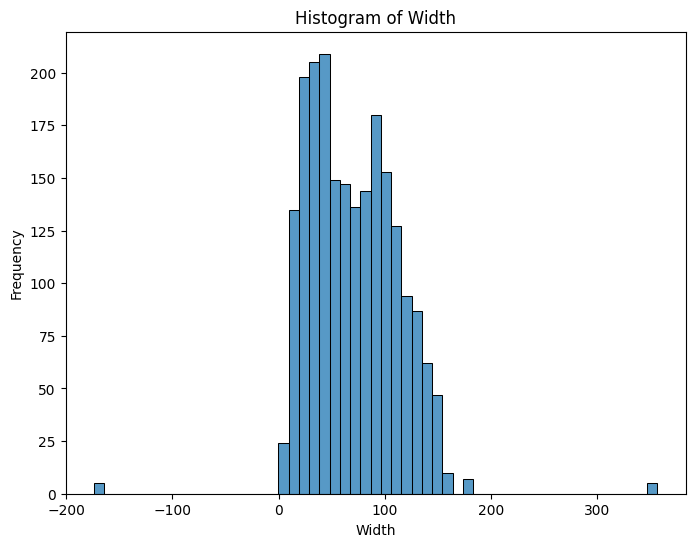

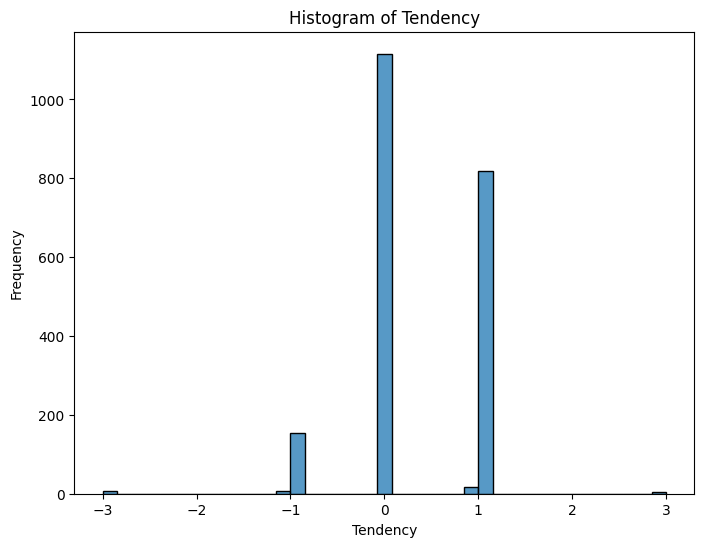

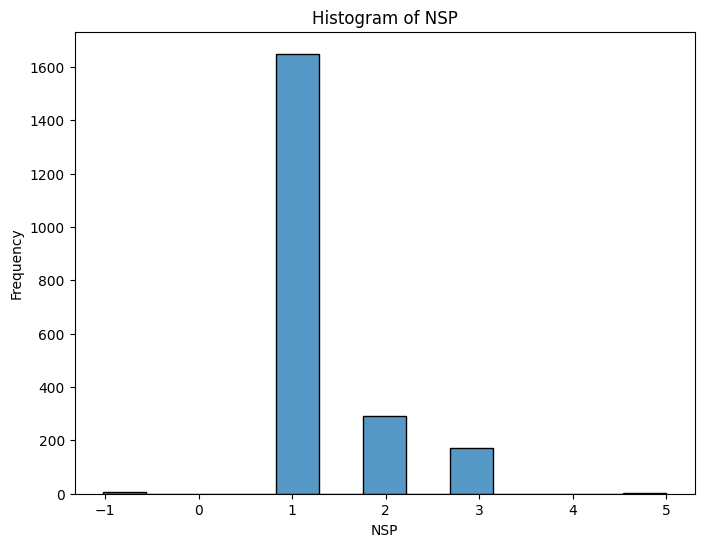

In [40]:
# Histograms

for i in df.columns:
  plt.figure(figsize=(8,6))
  sns.histplot(df[i])
  plt.title(f"Histogram of {i}")
  plt.xlabel(i)
  plt.ylabel("Frequency")
  plt.show()

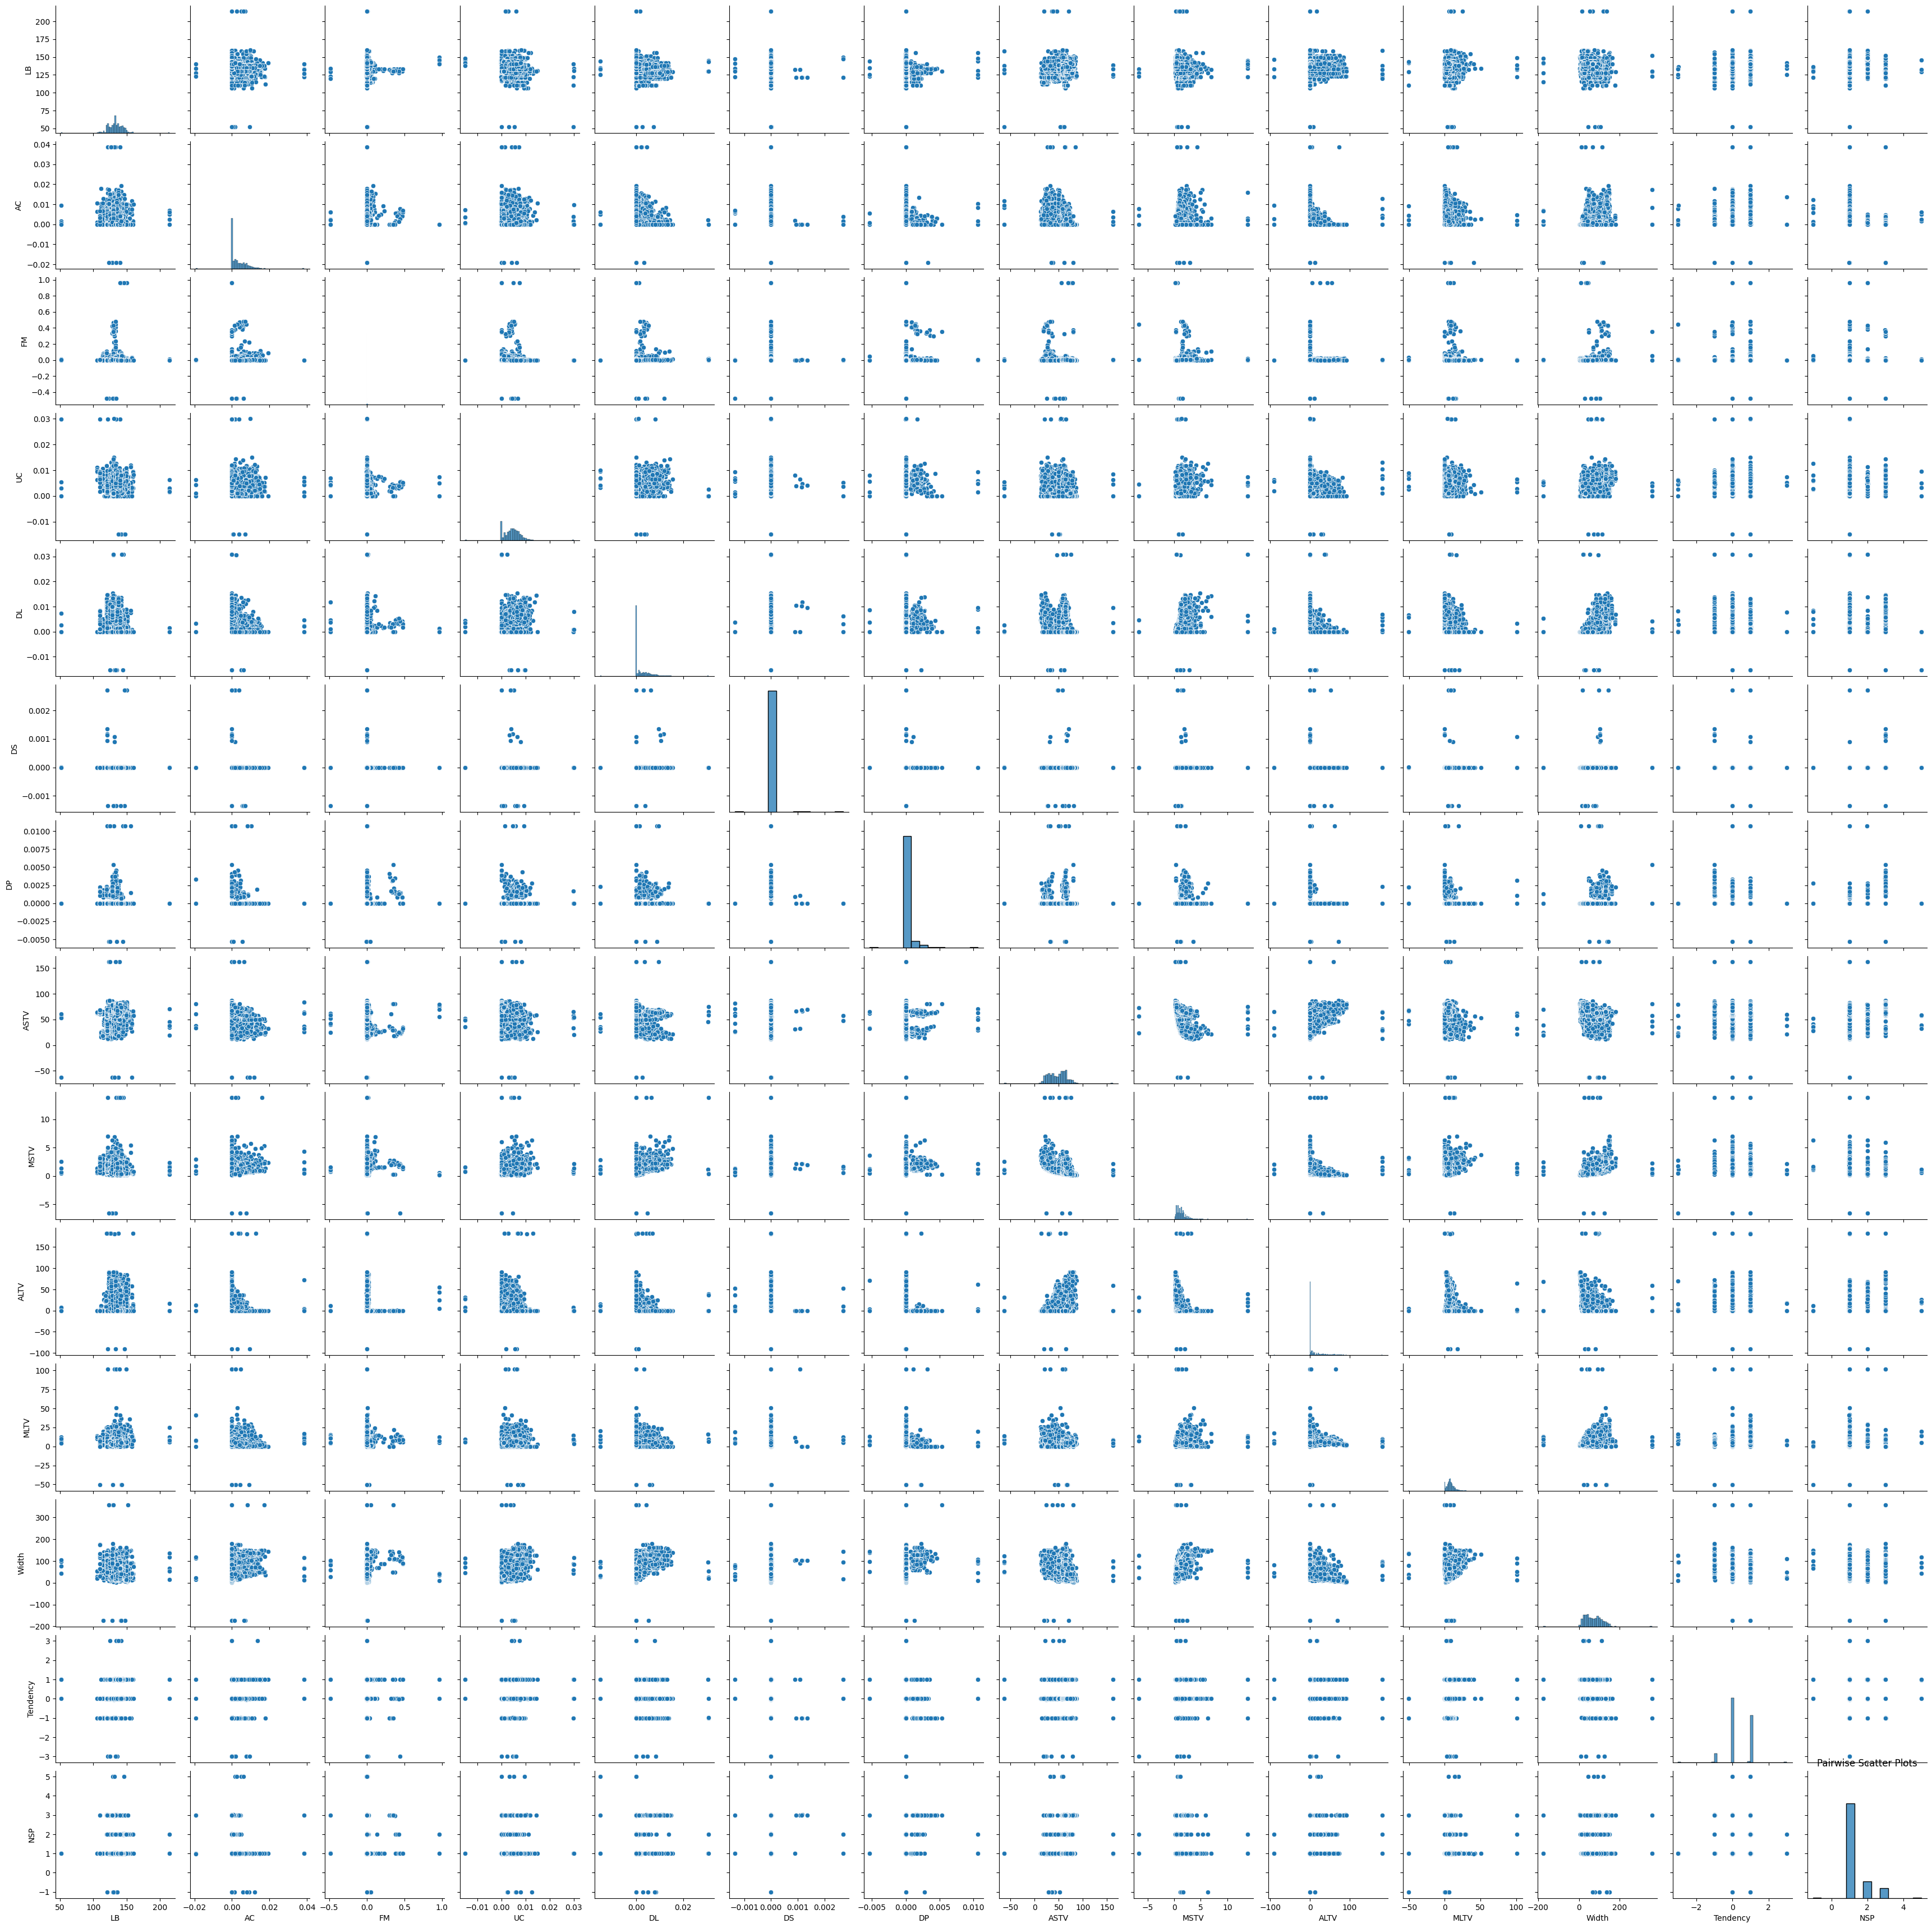

In [41]:
# Pairwise relationships between numerical attributes using pair plots.

sns.pairplot(df)
plt.title('Pairwise Scatter Plots')
plt.show()

In [42]:
# Correlation

corr = df.corr()
corr

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.063425,0.018839,-0.166669,-0.126585,-0.005433,-0.047653,0.241667,-0.169310,0.210769,-0.003190,-0.118347,0.236976,0.132003
AC,-0.063425,1.000000,0.009743,0.071313,-0.093581,-0.033097,-0.083350,-0.231086,0.133215,-0.269967,-0.104635,0.234534,0.031630,-0.311855
FM,0.018839,0.009743,1.000000,-0.053386,0.009641,0.029914,0.121434,-0.032838,0.017061,-0.012005,-0.006041,0.097204,-0.017888,0.074389
UC,-0.166669,0.071313,-0.053386,1.000000,0.189737,-0.006958,0.070144,-0.182379,0.189685,-0.227881,-0.048854,0.106474,-0.067314,-0.185766
DL,-0.126585,-0.093581,0.009641,0.189737,1.000000,0.058413,0.144631,-0.069907,0.410216,-0.187275,-0.165035,0.408340,-0.024180,0.024634
DS,-0.005433,-0.033097,0.029914,-0.006958,0.058413,1.000000,0.004317,0.008415,0.016028,-0.004344,0.034384,0.040844,-0.015304,0.065410
DP,-0.047653,-0.083350,0.121434,0.070144,0.144631,0.004317,1.000000,0.037959,0.118647,-0.077079,-0.113728,0.175363,-0.129316,0.295002
ASTV,0.241667,-0.231086,-0.032838,-0.182379,-0.069907,0.008415,0.037959,1.000000,-0.293820,0.357310,-0.219204,-0.207767,-0.011289,0.420738
MSTV,-0.169310,0.133215,0.017061,0.189685,0.410216,0.016028,0.118647,-0.293820,1.000000,-0.291979,0.028326,0.432988,-0.038010,-0.095881
ALTV,0.210769,-0.269967,-0.012005,-0.227881,-0.187275,-0.004344,-0.077079,0.357310,-0.291979,1.000000,-0.106963,-0.346228,0.038019,0.366318


<Axes: >

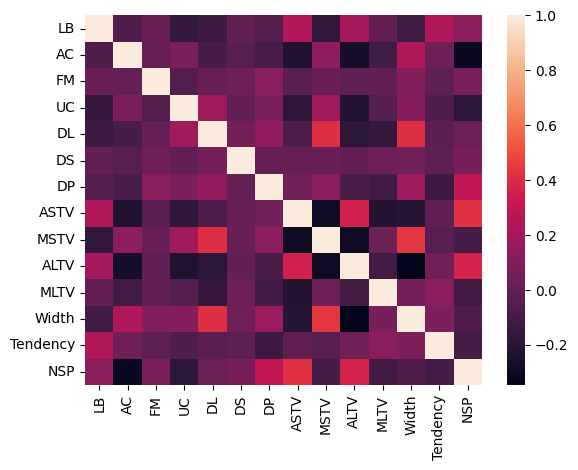

In [43]:
# Visualizing correlation

sns.heatmap(corr)

# 4.	Pattern Recognition and Insights:

In [44]:
# Calculate Pearson correlation matrix
pearson_corr_matrix = df.corr(method='pearson')

# Calculate Spearman correlation matrix
spearman_corr_matrix = df.corr(method='spearman')

# Calculate Kendall correlation matrix
kendall_corr_matrix = df.corr(method='kendall')

# Display the correlation matrices
print("Pearson Correlation Matrix:")
print(pearson_corr_matrix)
print("\nSpearman Correlation Matrix:")
print(spearman_corr_matrix)
print("\nKendall Correlation Matrix:")
print(kendall_corr_matrix)

Pearson Correlation Matrix:
                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063425  0.018839 -0.166669 -0.126585 -0.005433   
AC       -0.063425  1.000000  0.009743  0.071313 -0.093581 -0.033097   
FM        0.018839  0.009743  1.000000 -0.053386  0.009641  0.029914   
UC       -0.166669  0.071313 -0.053386  1.000000  0.189737 -0.006958   
DL       -0.126585 -0.093581  0.009641  0.189737  1.000000  0.058413   
DS       -0.005433 -0.033097  0.029914 -0.006958  0.058413  1.000000   
DP       -0.047653 -0.083350  0.121434  0.070144  0.144631  0.004317   
ASTV      0.241667 -0.231086 -0.032838 -0.182379 -0.069907  0.008415   
MSTV     -0.169310  0.133215  0.017061  0.189685  0.410216  0.016028   
ALTV      0.210769 -0.269967 -0.012005 -0.227881 -0.187275 -0.004344   
MLTV     -0.003190 -0.104635 -0.006041 -0.048854 -0.165035  0.034384   
Width    -0.118347  0.234534  0.097204  0.106474  0.408340  0.040844   
Tendency  0.236976  0.031630 -0.0178

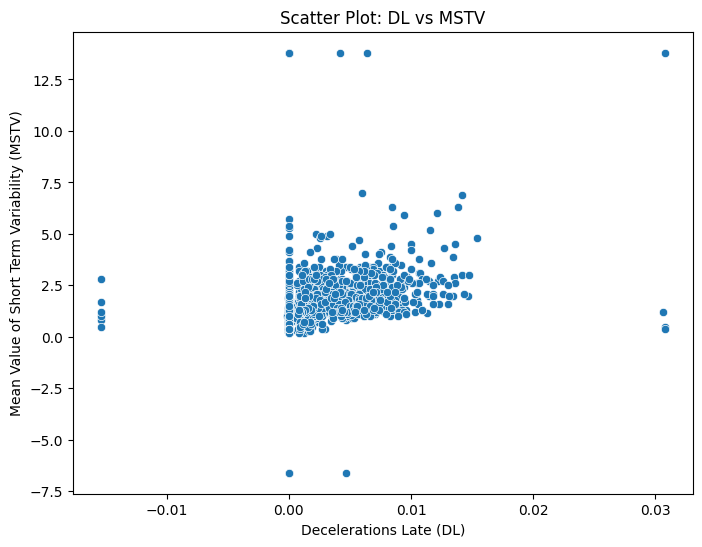

In [46]:
# Scatter plot between the highest correlation variables

plt.figure(figsize=(8, 6))
sns.scatterplot(x='DL', y='MSTV', data=df)
plt.title('Scatter Plot: DL vs MSTV')
plt.xlabel('Decelerations Late (DL)')
plt.ylabel('Mean Value of Short Term Variability (MSTV)')
plt.show()

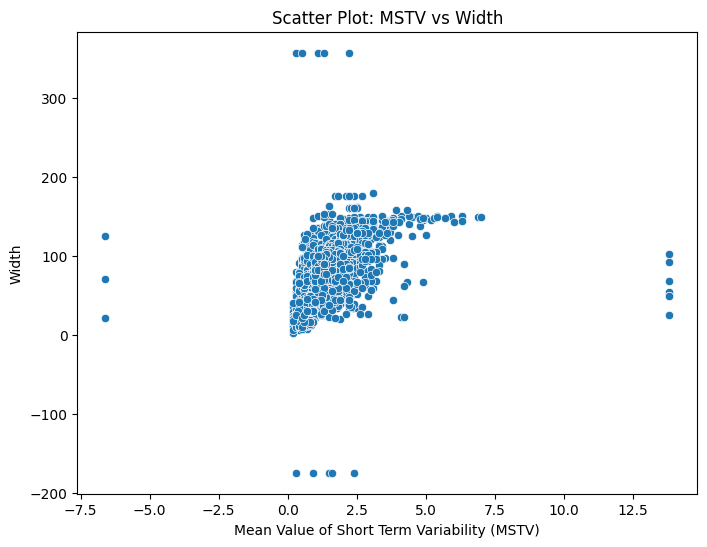

In [47]:
# Scatter plot between the highest correlation variables

plt.figure(figsize=(8, 6))
sns.scatterplot(x='MSTV', y='Width', data=df)
plt.title('Scatter Plot: MSTV vs Width')
plt.xlabel('Mean Value of Short Term Variability (MSTV)')
plt.ylabel('Width')
plt.show()

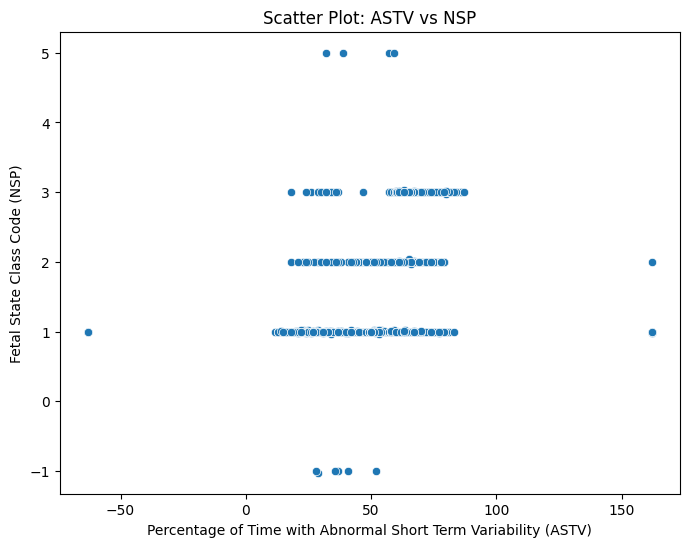

In [48]:
# Scatter plot between the highest correlation variables

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ASTV', y='NSP', data=df)
plt.title('Scatter Plot: ASTV vs NSP')
plt.xlabel('Percentage of Time with Abnormal Short Term Variability (ASTV)')
plt.ylabel('Fetal State Class Code (NSP)')
plt.show()

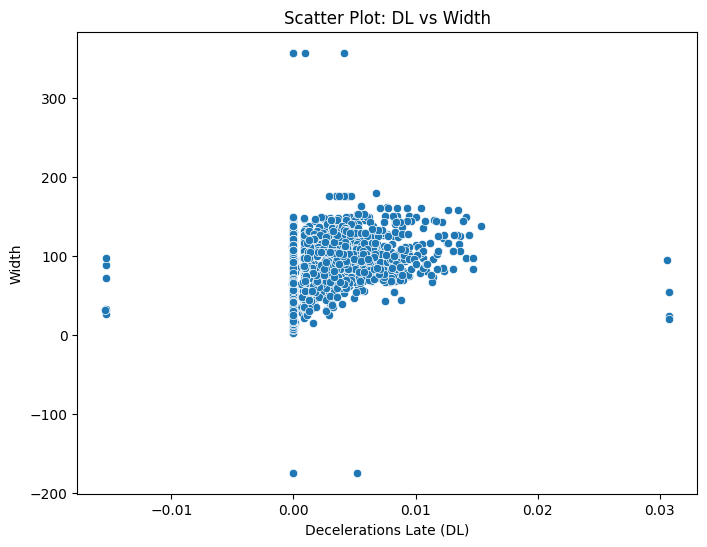

In [49]:
# Scatter plot between the highest correlation variables

plt.figure(figsize=(8, 6))
sns.scatterplot(x='DL', y='Width', data=df)
plt.title('Scatter Plot: DL vs Width')
plt.xlabel('Decelerations Late (DL)')
plt.ylabel('Width')
plt.show()

**# Therefore, MSTV and Width has the highest positive correlation of 0.43 which suggests a relationship between short-term variability in fetal heart rate and the width of the uterine contractions.**

# 5.	Conclusion:



●	Summarize the key insights and patterns discovered through your exploratory analysis.

1. Several moderate positive correlations were identified between various features related to fetal monitoring during pregnancy.
2. "Decelerations Late" (DL) showed a moderate positive correlation with both "Mean Value of Short Term Variability" (MSTV) and "Width," indicating potential associations between late decelerations and short-term variability in fetal heart rate, as well as the width of uterine contractions.

●	Discuss how these findings could impact decision-making or further analyses.

1. These findings can inform clinical decision-making during pregnancy and labor by providing insights into fetal well-being and labor progression.
2. Advanced statistical modeling techniques, such as multivariate regression or machine learning algorithms, can be employed to explore complex interactions between variables and predict outcomes.